In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('auto.csv')
df.head(10)

,Model,Origin,Price,MPG,Hroom,Rseat,Trunk,Weight,Length,Turn,Displa,Gratio
0,AMC Concord,A,4099,22,2.5,27.5,11,2930,186,40,121,3.58
1,AMC Pacer,A,4749,17,3.0,25.5,11,3350,173,40,258,2.53
2,AMC Spirit,A,3799,22,3.0,18.5,12,2640,168,35,121,3.08
3,Audi 5000,E,9690,17,3.0,27.0,15,2830,189,37,131,3.20
4,Audi Fox,E,6295,23,2.5,28.0,11,2070,174,36,97,3.70
5,BMW 320I,E,9735,25,2.5,26.0,12,2650,177,34,121,3.64
6,Buick Century,A,4816,20,4.5,29.0,16,3250,196,40,196,2.93
7,Buick Electra,A,7827,15,4.0,31.5,20,4080,222,43,350,2.41
8,Buick Le sabre,A,5788,18,4.0,30.5,21,3670,218,43,231,2.73
9,Buick Opel,A,4453,26,3.0,24.0,10,2230,170,34,304,2.87


In [4]:
df[["MPG","Weight"]].corr() # counting correlation between two columns

,MPG,Weight
MPG,1.000000,-0.822896
Weight,-0.822896,1.000000


In [5]:
df[["MPG","Weight"]].cov() # counting covariance between two columns

,MPG,Weight
MPG,33.472047,-3732.025176
Weight,-3732.025176,614492.484265


In [6]:
df[["Weight","Length"]].corr()

,Weight,Length
Weight,1.00000,0.95517
Length,0.95517,1.00000


In [7]:
df[["Weight","Length"]].cov()

,Weight,Length
Weight,614492.484265,16777.615698
Length,16777.615698,502.091262


In [8]:
df[["Price","Weight"]].corr()

,Price,Weight
Price,1.000000,0.551425
Weight,0.551425,1.000000


In [9]:
df[["Price","Weight"]].cov()

,Price,Weight
Price,8.632196e+06,1.270005e+06
Weight,1.270005e+06,6.144925e+05


In [10]:
cov = df.cov()
c1 = cov.abs().unstack()
c1.sort_values(ascending = False)


Price   Price     8.632196e+06
        Weight    1.270005e+06
Weight  Price     1.270005e+06
        Weight    6.144925e+05
Displa  Price     1.361822e+05
                      ...     
Rseat   Gratio    5.641170e-01
Gratio  Rseat     5.641170e-01
        Gratio    2.053936e-01
Hroom   Gratio    1.404369e-01
Gratio  Hroom     1.404369e-01
Length: 100, dtype: float64

In [11]:
df=df.corr()

In [12]:
len(df.columns) #amount of columns

10

In [13]:
corr = df.corr()
c1 = corr.abs().unstack()
c2=c1.sort_values(ascending = False)
c2[10:]


Weight  Length    0.996835
Length  Weight    0.996835
        Turn      0.994277
Turn    Length    0.994277
Displa  Weight    0.993558
                    ...   
Turn    Price     0.739707
Trunk   Price     0.701343
Price   Trunk     0.701343
        Hroom     0.519226
Hroom   Price     0.519226
Length: 90, dtype: float64

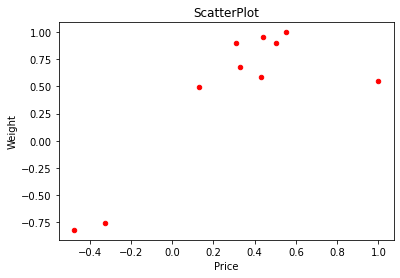

In [14]:
# scatter plot
df.plot(kind = 'scatter',
        x = 'Price',
        y = 'Weight',
        color = 'red')
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

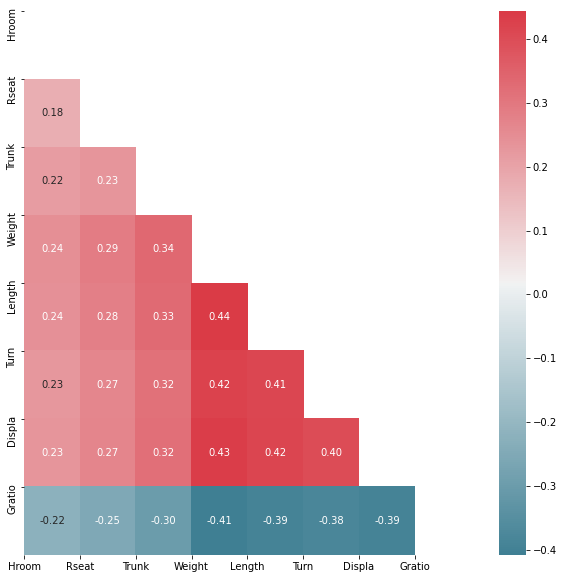

In [23]:
crossCorrelation(df.iloc[:,2::], mirror=False, correlation=False, scaling=False)

In [16]:
def crossCorrelation(df, mirror, correlation=True, scaling=False):
    
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt 
    from sklearn import preprocessing
    
    if scaling==True:
        x = df.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df = pd.DataFrame(x_scaled, columns=df.columns)
    
    # Create Correlation df
    if correlation==True:
        corr = df.corr()
    else :
        corr = df.cov()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
    # show plot
    plt.show()
    

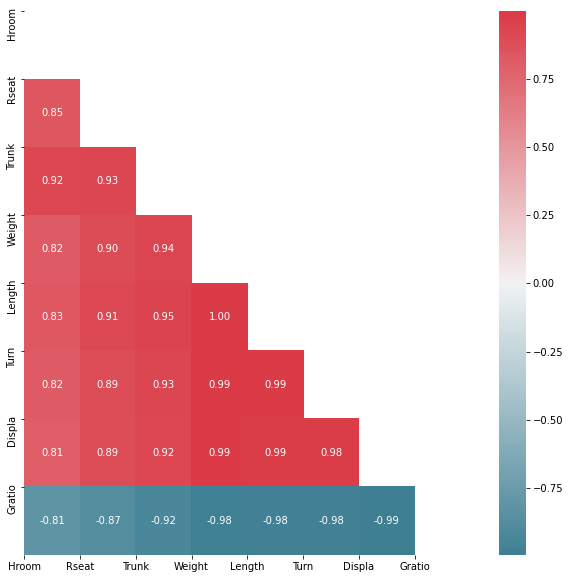

In [24]:
crossCorrelation(df.iloc[:,2::], mirror=False, correlation=True, scaling=False)